# Time Series:

# Exponential Smoothing Technique:

### importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

### Reading and Understanding Data:

In [2]:
df = pd.read_csv('airline-passenger-traffic.csv',header=None)

In [3]:
df.columns = ['Months','Passengers']

In [4]:
df.head()

,Months,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df.shape

(144, 2)

In [6]:
df.describe()

,Passengers
count,140.000000
mean,280.735714
std,120.593235
min,104.000000
25%,180.000000
50%,268.000000
75%,360.500000
max,622.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Months      144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df.dtypes

Months         object
Passengers    float64
dtype: object

### Converting into DateTime Series:

In [9]:
df['Months'] = pd.to_datetime(df['Months'],format='%Y-%m')

In [10]:
df.dtypes

Months        datetime64[ns]
Passengers           float64
dtype: object

In [11]:
df = df.set_index('Months')

In [12]:
df.head()

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Time Series Analysis:

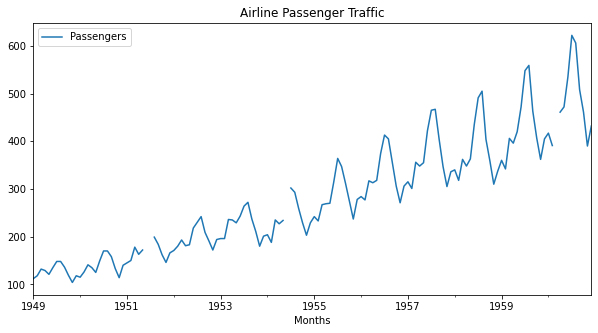

In [13]:
# plottig time series data:

df.plot(figsize=(10,5))
plt.title('Airline Passenger Traffic')
plt.show()

###  Missing Value Treatment:

In [14]:
# treating missing value with linear interpolation:

df1 = pd.read_csv('airline-passenger-traffic.csv',header=None)
df1.columns = ['Months','Passengers']

In [15]:
df1.dtypes

Months         object
Passengers    float64
dtype: object

In [16]:
# changing format of dtypes

df1['Months'] = pd.to_datetime(df1['Months'],format='%Y-%m')

In [17]:
df1.dtypes

Months        datetime64[ns]
Passengers           float64
dtype: object

In [18]:
df1 = df1.set_index(['Months'])

In [19]:
df1.head()

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


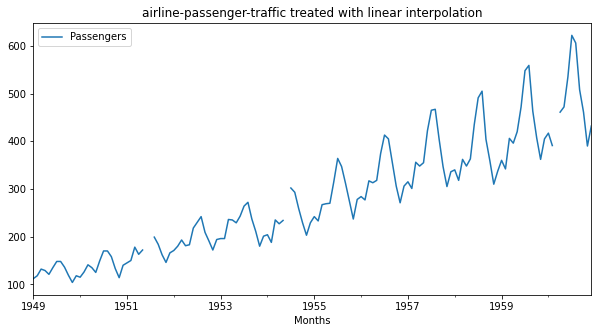

In [20]:
df1.plot(figsize=(10,5))
plt.title('airline-passenger-traffic treated with linear interpolation')
plt.show()

In [21]:
# using interpolate method:

df1['Passengers'].fillna(df1['Passengers'].interpolate(method='linear'),inplace=True)

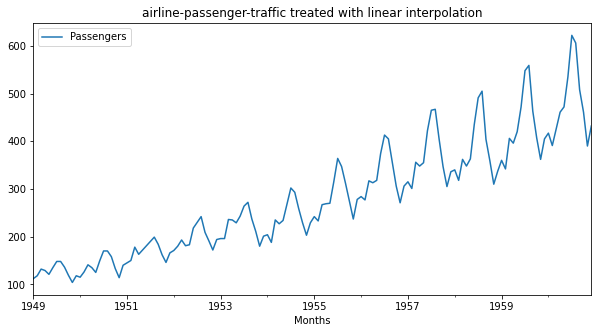

In [22]:
df1.plot(figsize=(10,5))
plt.title('airline-passenger-traffic treated with linear interpolation')
plt.show()

### Outliers detection:

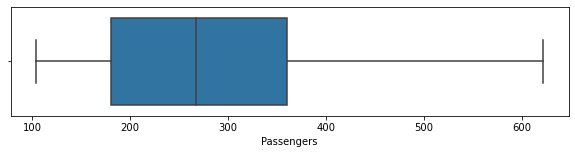

In [23]:
# boxplot:

plot=plt.subplots(figsize=(10,2))
box_plot = sns.boxplot(x=df1['Passengers'],whis=1.5)

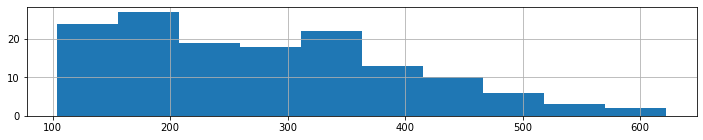

In [24]:
# histogram:

plot = df1['Passengers'].hist(figsize=(12,2))

### Time Series Decomposition:

### Additive:

In [25]:
from statsmodels.api import tsa

<Figure size 720x360 with 0 Axes>

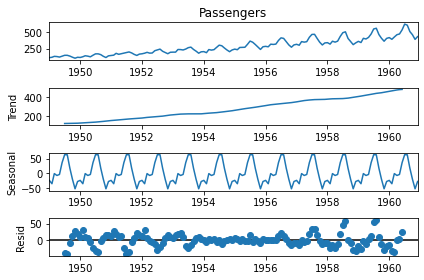

In [26]:
plt.figure(figsize=(10,5))
dc = tsa.seasonal_decompose(df1['Passengers'], model='additive')
dc.plot()
plt.show()

### Multiplicative:



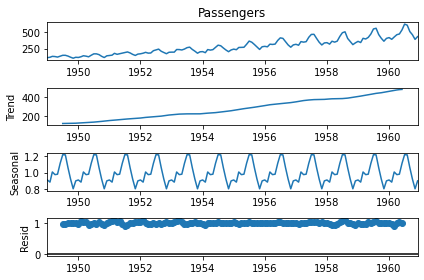

In [27]:
# multiplicative:

dc = tsa.seasonal_decompose(df1['Passengers'],model= 'multplicative')
dc.plot()
plt.show()

### Splitting time series:

In [28]:
train_len = 120
train = df1[0:train_len]
test=df1[train_len:]

In [29]:
y_pred = train['Passengers'][train_len-1]
y_pred

337.0

In [30]:
# adding new column to df1 set:

train['y_pred']=y_pred

In [31]:
train.head()

,Passengers,y_pred
Months,,
1949-01-01,112.0,337.0
1949-02-01,118.0,337.0
1949-03-01,132.0,337.0
1949-04-01,129.0,337.0
1949-05-01,121.0,337.0


## Exponential Smoothing Technique:

### Simple Exponential Smoothing Technique:

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params

C:\Users\Swati Nikhil Lathiya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
y_pred_ses = test.copy()
y_pred_ses['ses_forecast'] = model_fit.forecast(24)

In [34]:
y_pred_ses

,Passengers,ses_forecast
Months,,
1959-01-01,360.0,374.897327
1959-02-01,342.0,374.897327
1959-03-01,406.0,374.897327
1959-04-01,396.0,374.897327
1959-05-01,420.0,374.897327
1959-06-01,472.0,374.897327
1959-07-01,548.0,374.897327
1959-08-01,559.0,374.897327
1959-09-01,463.0,374.897327


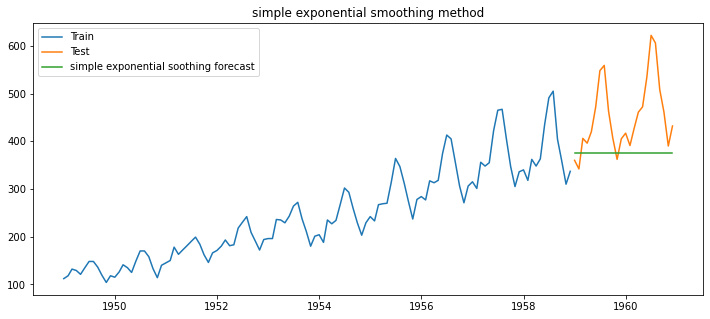

In [35]:
plt.figure(figsize=(12,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_pred_ses['ses_forecast'], label='simple exponential soothing forecast')
plt.title('simple exponential smoothing method')
plt.legend(loc='best')
plt.show()

### Calculating RMSE and MAPE:

In [36]:
# RMSE:

from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(test['Passengers'],y_pred_ses['ses_forecast'])
mse

11587.89179069725

In [38]:
rmse = np.sqrt(mse)
rmse

107.64707051609555

In [39]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

107.65

In [40]:
# MAPE:

error = test['Passengers']-y_pred_ses['ses_forecast']
abs_error = np.abs(error)

In [41]:
per_abs_error = (abs_error/test['Passengers'])*100

In [42]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

16.49

### Double [Holt's] Exponential Smoothing Technique:

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='multiplicative', seasonal=None)

In [45]:
model = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

In [46]:
model.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 1.0535714285714286,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [47]:
y_pred = test.copy()
y_pred['Hes_forecast']=model.forecast(24)

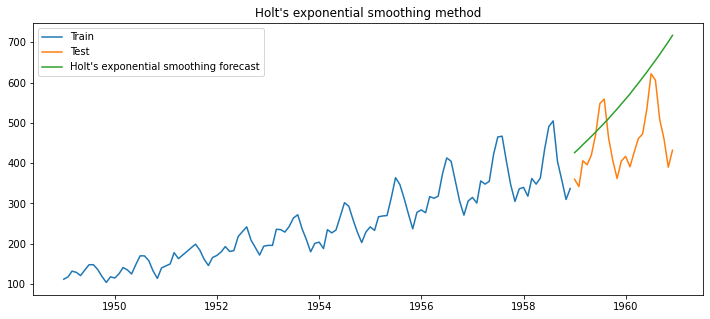

In [48]:
plt.figure(figsize=(12,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_pred['Hes_forecast'], label='Holt\'s exponential smoothing forecast')
plt.title('Holt\'s exponential smoothing method')
plt.legend(loc='best')
plt.show()

### Calculating RMSE and MAPE

In [49]:
#RMSE:

mse = mean_squared_error(test['Passengers'],y_pred['Hes_forecast'])
mse

19828.50901002911

In [50]:
rmse = np.sqrt(mse)
rmse

140.81373871192082

In [51]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

140.81

In [52]:
# MAPE:

error = test['Passengers']-y_pred['Hes_forecast']
abs_error = np.abs(error)

In [53]:
per_abs_error = (abs_error/test['Passengers'])*100

In [54]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

27.4

### Holt's [triple] Winters Exponential Smoothing Technique:

In [66]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='mul', seasonal='mul')

In [67]:
model = model.fit(optimized=True)

In [68]:
model.params

{'smoothing_level': 0.3863531586174843,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.6136468413825157,
 'damping_trend': nan,
 'initial_level': 189.17094030071988,
 'initial_trend': 1.0096633593581248,
 'initial_seasons': array([0.58638569, 0.61947938, 0.68400397, 0.64874643, 0.59489239,
        0.65139604, 0.71112217, 0.7069272 , 0.64288001, 0.55712621,
        0.49347663, 0.57567432]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
y_pred['Hw_forecast']=model.forecast(24)

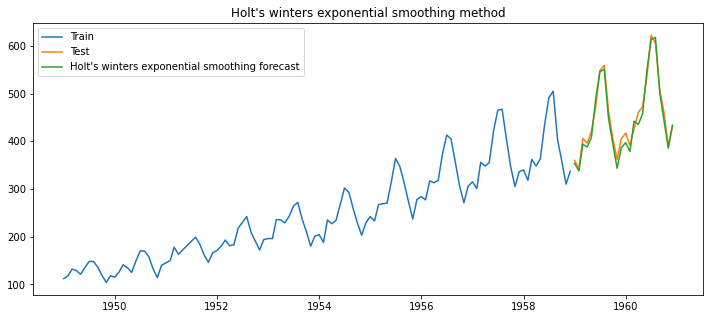

In [70]:
plt.figure(figsize=(12,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_pred['Hw_forecast'], label='Holt\'s winters exponential smoothing forecast')
plt.title('Holt\'s winters exponential smoothing method')
plt.legend(loc='best')
plt.show()

### calculating RMSE and MAPE:

In [71]:
#RMSE:

mse = mean_squared_error(test['Passengers'],y_pred['Hw_forecast'])
mse

178.51240558841258

In [72]:
rmse = np.sqrt(mse)
rmse

13.36085347529912

In [73]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

13.36

In [74]:
# MAPE:

error = test['Passengers']-y_pred['Hw_forecast']
abs_error = np.abs(error)

In [75]:
per_abs_error = (abs_error/test['Passengers'])*100

In [76]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

2.71